In [48]:
!pip install btjenesten
import numpy as np
import matplotlib.pyplot as plt
import btjenesten
from sklearn.datasets import *
from scipy.interpolate import interp1d
import gpr
import kernels as kn

# The most common regression models, and why they might not work:

Each model carries with them an inductive bias, that is a set of assumptions that one has to make in order to make the model fit your data. I. ex: If you choose linear regression you assume that your data is linearly dependent (or atleast close to). What do we do if the underlying function of some data is more complex?

Gaussian Processes lets the data speak more for itself, by assuming that our output data is distributed as a multivariate gaussian distribution (which is actually a pretty weird assumption!). This means that in addition to getting an estimate for the function value $f(\mathbf{x})$ we can also get a representation of the uncertainty if of $f$ at any value $\mathbf{x}$. 

Let us take a look at an example using $f(x) = e^{-(x-1)^2} + e^{-(x+1)^2}$ as our model function

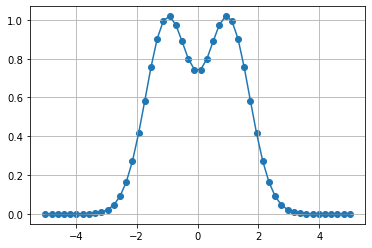

In [83]:
fx = lambda x: np.exp(-(x-1)**2) + np.exp(-(x+1)**2)

x = np.linspace(-5, 5, 50)

plt.plot(x, fx(x))
plt.scatter(x, fx(x))
plt.grid()
plt.show()

Lets try to model it using a normal polynomial of varying degrees. To evaluate processes 50 times in in higher dimensions can be quite challenging, so lets assume we have "measured" $f(x)$ 20 times, forming a uniform grid over $x \in [-5, 5]$

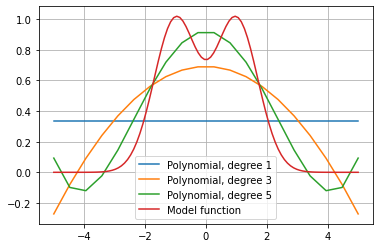

In [88]:
x = np.linspace(-5, 5, 20)
y = fx(x)

a, b = np.polyfit(x, y, 1) #linear regression
f1 = a * x + b

a, b, c, d = np.polyfit(x, y, 3) #cubic
f3 = a*x**3 + b*x**2 + c*x + d

a, b, c, d, e, f = np.polyfit(x, y, 5)
f5 = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

plt.plot(x, f1, label="Polynomial, degree 1")
plt.plot(x, f3, label="Polynomial, degree 3")
plt.plot(x, f5, label="Polynomial, degree 5")

x = np.linspace(-5, 5, 100)
plt.plot(x, fx(x), label="Model function")
plt.grid()
plt.legend()
plt.show()

These functions do a poor job at imitating our model function, so what can we do? Obviously we can increase the dimensionality.

# Gaussian process regression:

Gives us an estimate for the mean of an infinite number of gaussian distributions, and also for the variance! This means that GPR is a great ML-model for use in chemistry, where estimates of the uncertainty are very important. To construct a gaussian process regressor we need two things. First we need to decide what kernel we need to use. The kernel function, $k(x_i, x_j)$ gives us a value that determines the covariance between the two parameter-values $x_i$ and $x_j$. We then construct a covariance-matrix using the kernel function. Given two vectors, $\mathbf{v}$ and $\mathbf{w}$ we obtain:
\begin{equation}
    K_{vw}=K(\mathbf{v}, \mathbf{w}) =
    \label{eqn:covmatrix}
    \begin{bmatrix}
    k(v_1,w_1) & k(v_1,w_2) & k(v_1,w_3) & \dots & k(v_1,w_n) \\
    k(v_2,w_1) & k(v_2,w_2) & k(v_2,w_3) & \dots & k(v_2,w_n)\\
    k(v_3,w_1) & k(v_3,w_2) & k(v_3,w_3) & \dots & k(v_3,w_n) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    k(v_m,w_1) & k(v_m,w_2) & k(v_m,w_3) & \dots & k(v_m,w_n)
\end{bmatrix}.
\end{equation}

Using bayes theorem we can obtain formulas for the mean prediction $y_2$ and the variance $var(y_2)$. Given some training data $X_1$ and $y_1$ we can make a prediction of $y_2$ from the corresponding input data $X_2$ as such:
\begin{equation}
y_2 = K_{12}K_{11}^{-1}y_1,
\end{equation}
and the variance,
\begin{equation}
var(y_2) = K_{22} - K_{12}K_{11}^{-1}K_{12}^T
\end{equation}

In [72]:
kernel = kn.RBF
regressor = gpr.Regressor(X[:,0], X[:,1], kernel=kernel)

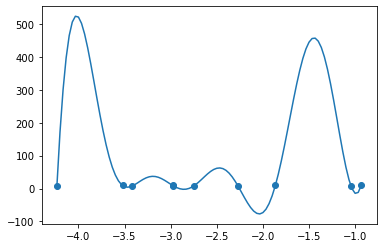

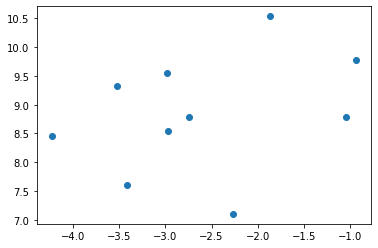

In [75]:
plt.plot(x, regressor.predict(x))
plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X[:,0], np.abs(X[:,1] - regressor.predict(X[:,1])))